<a href="https://colab.research.google.com/github/ULUGBEK12194914/AI_application/blob/main/LinearRegression(week6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110.5 MB 1.3 kB/s 
     |████████████████████████████████| 503 kB 37.7 MB/s 
     |████████████████████████████████| 2.9 MB 39.1 MB/s 
     |████████████████████████████████| 50 kB 5.6 MB/s 
     |████████████████████████████████| 20.1 MB 8.5 MB/s 
     |████████████████████████████████| 3.8 MB 43.3 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=5ecf4b798f74af56c27f604de7c6e2ef32d9ce6a4034d3fd0cf2e4e8868656a5
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninst

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
learning_parameter = 0.01
epochs = 300

In [5]:
sample_points = 50
x_train = np.linspace(0, 30, sample_points)
y_train = 6*x_train + 7*np.random.randn(sample_points)

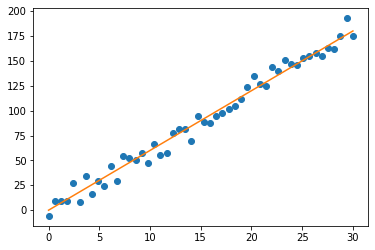

In [6]:
# Noisy dataset
plt.plot(x_train, y_train, 'o')
# Noise free dataset 
plt.plot(x_train, 6*x_train)
plt.show()

In [7]:
Y = tf.placeholder(tf.float32)
X = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name = 'weights')
B = tf.Variable(np.random.randn(), name = 'bias')


In [11]:
#Create the model for regression
prediction = W*X + B

# Cost function
cost_iteration = tf.reduce_sum((prediction-Y)**2)/(2*sample_points)

#Define the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

# Initialize the variables
init = tf.global_variables_initializer()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epochs 0.000000 Cost 0.154752 Weight 5.665872 Bias 0.810562
Epochs 40.000000 Cost 0.389723 Weight 6.009754 Bias 0.670748
Epochs 80.000000 Cost 0.392550 Weight 6.015407 Bias 0.523763
Epochs 120.000000 Cost 0.395118 Weight 6.020525 Bias 0.390661
Epochs 160.000000 Cost 0.397452 Weight 6.025161 Bias 0.270135
Epochs 200.000000 Cost 0.399572 Weight 6.029358 Bias 0.160994
Epochs 240.000000 Cost 0.401493 Weight 6.033159 Bias 0.062164
Epochs 280.000000 Cost 0.403241 Weight 6.036601 Bias -0.027329


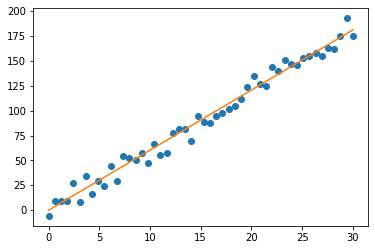

In [12]:
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict = {X : x, Y : y})
    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X : x, Y : y})
      print('Epochs %f Cost %f Weight %f Bias %f' %(epoch, cost_iter, W1, B1))
  Weight = sess.run(W)
  Bias = sess.run(B)

  plt.plot(x_train, y_train, 'o')
  plt.plot(x_train,Weight*x_train+Bias)
  plt.show()

In [13]:
# Create the model for regression
with tf.name_scope("Model") as scope:
  prediction = W*X + B

# Add summary to study behaviour of weights and biases with epochs
weight_histogram = tf.summary.histogram("Weights", W)
bias_histogram = tf.summary.histogram("Bias", B)

# Cost function
with tf.name_scope("Cost_function") as scope:
  cost_iteration = tf.reduce_sum((prediction-Y)**2)/(2*sample_points)

# Record the scalar summary of the cost function
cost_summary = tf.summary.scalar("Cost", cost_iteration)

In [14]:
#Define the optimizer
with tf.name_scope("Training") as scope:
  optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

# Initialize the variables
init = tf.global_variables_initializer()

#Merge all the summaries into a single operator
merged_summary = tf.summary.merge_all()

Epochs 0.000000 Cost 0.154752 Weight 5.665872 Bias 0.810562
Epochs 40.000000 Cost 0.389723 Weight 6.009754 Bias 0.670748
Epochs 80.000000 Cost 0.392550 Weight 6.015407 Bias 0.523763
Epochs 120.000000 Cost 0.395118 Weight 6.020525 Bias 0.390661
Epochs 160.000000 Cost 0.397452 Weight 6.025161 Bias 0.270135
Epochs 200.000000 Cost 0.399572 Weight 6.029358 Bias 0.160994
Epochs 240.000000 Cost 0.401493 Weight 6.033159 Bias 0.062164
Epochs 280.000000 Cost 0.403241 Weight 6.036601 Bias -0.027329


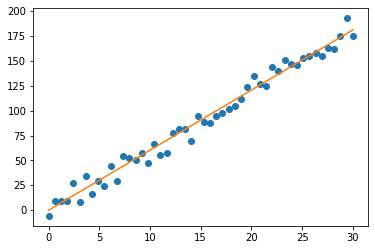

In [15]:
# Define the tensorflow session
with tf.Session() as sess:
  sess.run(init)
  writer = tf.summary.FileWriter('./log', sess.graph)
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict = {X : x, Y : y})

      # Write logs for each epochs
      summary_epochs = sess.run(merged_summary, feed_dict = {X : x, Y : y})
      writer.add_summary(summary_epochs, epoch)
    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X : x, Y : y})
      print('Epochs %f Cost %f Weight %f Bias %f' %(epoch, cost_iter, W1, B1))
  Weight = sess.run(W)
  Bias = sess.run(B)

  plt.plot(x_train, y_train, 'o')
  plt.plot(x_train,Weight*x_train+Bias)
  plt.show()
